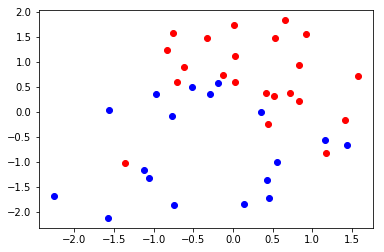

In [117]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

# definition of constant values
n = 40
lam = 1

# create dataset
omega = np.random.randn(1)
noise = 0.8 * np.random.randn(n)
x = np.random.randn(n, 2)
y = np.where(omega * x[:, 0] + x[:, 1] + noise > 0, 1, -1)

# plot dataset
def plot_dataset(show=True, axes=plt):
    for data, label in zip(x,y):
        color= 'b' if label < 0 else 'r'
        axes.plot(data[0], data[1], color+'o')
    if show: plt.show()
        
plot_dataset()

In [119]:
# declation of variables
w1 = Symbol('w1')
w2 = Symbol('w2')
w = np.array([w1, w2])

# define J(w)
j = sum([log(exp(tmp) + 1) for tmp in -y * np.sum(w * x, axis=1)]) + lam * sum(w * w) 
    

# batch steepest gradient method
def gradient_method(epoch=10, lr=0.2):
    grad = diff(j, w)
    omega = np.ones_like(w)
    js = []
    for step in range(epoch + 1):
        js.append(j.subs([(w1, omega[0]), (w2, omega[1])]))
        print('{} step:\tJ={}\tw={}'.format(step, js[step], omega))
        omega = omega - lr * grad.subs([(w1, omega[0]), (w2, omega[1])])
        
    fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
    
    axL.plot(np.arange(epoch+1), np.array(js))
    
    axR.set_ylim([x[:, 1].min() - 1, x[:, 1].max() + 1])
    v1 = np.linspace(x[:, 0].min(), x[:, 0].max(), 100)
    v2 = - omega[0] / omega[1] * v1
    axR.plot(v1, v2, 'r-')
    plot_dataset(False, axes=axR)
    
    
# Newton based method
def newton_method(epoch=10):
    omega = np.ones_like(w)
    d1, d2 = Symbol('d1'), Symbol('d2')
    d = np.array([d1, d2])
    js = []
    for step in range(epoch + 1):
        js.append(j.subs([(w1, omega[0]), (w2, omega[1])]))
        print('{} step:\tJ={}\tw={}'.format(step, js[step], omega))
        grad = diff(j, w).subs([(w1, omega[0]), (w2, omega[1])])
        hesian = np.array(diff(j, w, 2).subs([(w1, omega[0]), (w2, omega[1])])).reshape(2, 2)
        omega  += np.array(list(solve(np.dot(hesian, d) + grad).values()))
        
    fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
    
    axL.plot(np.arange(epoch+1), np.array(js))
    
    axR.set_ylim([x[:, 1].min() - 1, x[:, 1].max() + 1])
    v1 = np.linspace(x[:, 0].min(), x[:, 0].max(), 100)
    v2 = - omega[0] / omega[1] * v1
    axR.plot(v1, v2, 'r-')
    plot_dataset(False, axes=axR)

0 step:	J=19.3854312057805	w=[1 1]
1 step:	J=18.6528738612546	w=[0.377449995083571 1.47955808861596]
2 step:	J=18.4310652172572	w=[0.636677509927758 1.17977215810967]
3 step:	J=18.3910640066206	w=[0.516222557842751 1.32043427511857]
4 step:	J=18.3792819122858	w=[0.574609680564521 1.24395325392025]
5 step:	J=18.3764906983295	w=[0.545754601934096 1.28239003209837]
6 step:	J=18.3757385078163	w=[0.560205493822644 1.26244500038093]
7 step:	J=18.3755483347739	w=[0.552920986575673 1.27256583348957]
8 step:	J=18.3754985936352	w=[0.556608026609452 1.26738946716108]
9 step:	J=18.3754858046740	w=[0.554737963894446 1.27002093031599]
10 step:	J=18.3754824873085	w=[0.555687624252737 1.26868057512048]


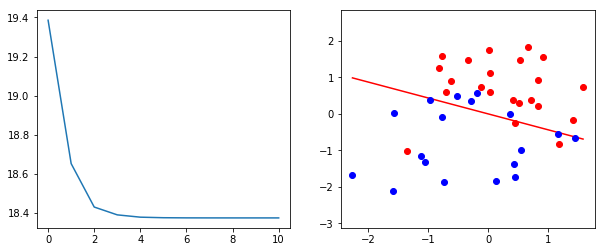

In [120]:
# run the batch steepest gradient method and show the result.
gradient_method()

0 step:	J=19.3854312057805	w=[1 1]
1 step:	J=18.3789954500787	w=[0.537103841975826 1.24205860206500]
2 step:	J=18.3754818462013	w=[0.555153439548974 1.26879894949680]
3 step:	J=18.3754813316182	w=[0.555367652231660 1.26913224867861]
4 step:	J=18.3754813316182	w=[0.555367683157366 1.26913229834301]
5 step:	J=18.3754813316182	w=[0.555367683157367 1.26913229834301]
6 step:	J=18.3754813316182	w=[0.555367683157366 1.26913229834301]
7 step:	J=18.3754813316182	w=[0.555367683157366 1.26913229834301]
8 step:	J=18.3754813316182	w=[0.555367683157366 1.26913229834301]
9 step:	J=18.3754813316182	w=[0.555367683157366 1.26913229834301]
10 step:	J=18.3754813316182	w=[0.555367683157366 1.26913229834301]


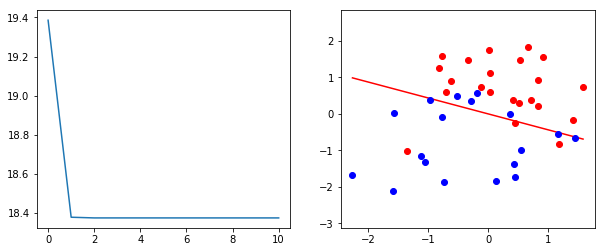

In [121]:
# run the Newton based method and show the result.
newton_method()